# Evaluation for Translation Models

## DataSet

1. Hindi to English Translation Benchmark Dataset
2. Tamil to English Translation Benchmark Dataset
3. English to Kannada Translation Benchmark Dataset
4. Malayalam to English Translation Benchmark Dataset

Size : 1997 Entries

Sample size used for this evaluation : 200 / 1997

Source organisation:  Digital India BHASHINI Division

Site: https://aikosh.indiaai.gov.in/web/datasets/ 

License : CC BY-SA 4.0

About Datasets: 
The datasets provides news test references for Machine Translation (MT) evaluation, focusing on translations from Indian languages to English. 
As part of a comprehensive collection supporting translations into 128 target languages, this dataset includes document-level information, making it a valuable resource for multilingual MT benchmarking. Designed for the news domain, it facilitates the evaluation of translation quality and supports the development of robust translation systems. Submitted by Microsoft, this dataset is essential for researchers and developers working on translation tasks.

## Evaluation Models

3 Models are considered for this comparison 

1. llama3-8b-8192
2. gpt-4o-mini
3. Sarvam



## Evaluation Methods

We used three evaluation methods to compare the translated output from the models to the reference output:

1. **BLEU Score**
2. **METEOR Score**
3. **ROUGE Scores**

---

### BLEU

**BLEU** (Bilingual Evaluation Understudy) is an automatic metric for evaluating the quality of machine translations by comparing them to one or more human-generated reference translations based on overlapping n-grams.

- **How it works:**  
    BLEU calculates n-gram precision (matching n-grams between the candidate and reference) and applies a brevity penalty to discourage overly short translations. The final score is the geometric mean of n-gram precisions, weighted by their order (e.g., unigrams, bigrams).

- **Score Range:**  
    BLEU scores range from 0 to 1 (often shown as percentages, e.g., 0.4 → 40%), where higher scores indicate better translation quality.

- **Limitations:**  
    BLEU does not account for synonyms, fluency, or contextual meaning and works best for evaluating longer texts. Human evaluation is often needed alongside BLEU to capture translation quality nuances.

---

### METEOR

**METEOR** (Metric for Evaluation of Translation with Explicit ORdering) is a machine translation evaluation metric that measures the similarity between a candidate translation and reference translations, considering word matches, synonyms, stemming, and paraphrasing.

- **How it works:**  
    METEOR aligns words between the candidate and reference translations using exact matches, stemmed matches, and synonyms. It calculates precision, recall, and a harmonic mean (F-score), while incorporating a penalty for word order differences.

- **Score Range:**  
    METEOR scores range from 0 to 1, where 1 indicates a perfect match. Higher scores suggest better alignment and quality.

- **Limitations:**  
    METEOR is more computationally complex than BLEU and may struggle with longer texts. It also relies on external linguistic resources (e.g., WordNet for synonyms), which may not always cover all languages effectively.

---

### ROUGE

**ROUGE** (Recall-Oriented Understudy for Gisting Evaluation) is a family of metrics used to evaluate the quality of summaries or translations by comparing overlapping units such as n-grams, word sequences, or sentence-level matches with reference texts.

- **How it works:**  
    ROUGE calculates recall, precision, and F-scores for n-gram matches (e.g., ROUGE-N), longest common subsequence (ROUGE-L), or skip-grams. It measures how much content from the reference is captured by the candidate.

- **Score Range:**  
    ROUGE scores range from 0 to 1, where higher values indicate better overlap between the candidate and reference text.

- **Limitations:**  
    ROUGE emphasizes surface-level similarity and does not account for linguistic variation (e.g., synonyms, paraphrasing). It is less suitable for evaluating fluency, coherence, or readability in translations or summaries.

---

> **Summary Table**

| Metric  | Measures                | Range   | Strengths                                 | Limitations                                 |
|---------|-------------------------|---------|-------------------------------------------|---------------------------------------------|
| BLEU    | n-gram precision        | 0–1     | Fast, widely used, good for longer texts  | Ignores synonyms/context, brevity penalty   |
| METEOR  | Precision, recall, F1   | 0–1     | Considers synonyms, stemming, word order  | Slower, needs linguistic resources          |
| ROUGE   | Recall, precision, F1   | 0–1     | Good for content overlap, summaries       | Surface-level, ignores fluency/meaning      |

#### Load Data

In [1]:
import json
import os

# Define the paths to the JSON files
dataset_dir = "Datasets/AIKOSH_Dataset"
json_files = [
    "english_malayalam.json",
    "english_kannada.json",
    "tamil_english.json",
    "hindi_english.json"
]

# Read and store the data from each JSON file
datasets = {}
for filename in json_files:
    path = os.path.join(dataset_dir, filename)
    with open(path, 'r', encoding='utf-8') as f:
        datasets[filename] = json.load(f)

# Example: print the number of samples in each dataset

for name, data in datasets.items():
    print(f"\n{name} (showing 10 entries):")
    for entry in data[:10]:
        print(entry)
    print(f"{name}: {len(data)} samples")


english_malayalam.json (showing 10 entries):
{'sourceText': "Welsh AMs are worried about 'looking like muppets'", 'targetText': "'വിഡ്ഡികളെപ്പോലെ ഇരിക്കുന്നതിനെ' കുറിച്ച് വെൽഷ് അസംബ്ലി അംഗങ്ങൾക്ക് ആകുലത"}
{'sourceText': 'There is consternation among some AMs at a suggestion that their title should change to MWPs (Member of the Welsh Parliament).', 'targetText': "തങ്ങളുടെ പദവിപ്പേര് 'എം\u200cഡബ്ലിയൂപികൾ' (വെൽഷ് പാർലിമെന്റിലെ അംഗം) എന്ന് മാറ്റണമെന്ന നിർദ്ദേശത്തിൽ ചില അസംബ്ലി അംഗങ്ങൾക്ക് ഇടയിൽ പരിഭ്രാന്തിയുണ്ട്."}
{'sourceText': 'It has arisen because of the plans to change the name of the assembly to the Welsh Parliament.', 'targetText': 'അസംബ്ലിയുടെ പേര്, വെൽഷ് പാർലിമെന്റ് എന്നായി പുനർനാമകരണം ചെയ്യുന്നതിനുള്ള പദ്ധതി ഉള്ളതിനാലാണ് ഈ നിർദ്ദേശം ഉയർന്നുവന്നത്.'}
{'sourceText': 'AMs across the political spectrum are worried it could invite ridicule.', 'targetText': 'ഈ നീക്കം പരിഹാസം ക്ഷണിച്ചുവരുത്തുമെന്ന് വിവിധ രാഷ്ട്രീയപ്പാർട്ടികളിൽ ഉടനീളമുള്ള അസംബ്ലി അംഗങ്ങൾ ആകുലപ്പെടുന്നു.'}
{'sourceText'

In [2]:
# Create lists to store sentences
malayalam_sentences = []
kannada_sentences = []
tamil_sentences = []
hindi_sentences = []
english_sentences = []

# Track already added English sentences
english_seen = set()

for file in json_files:
    data = datasets[file]
    src_lang, tgt_lang = file.replace('.json', '').split('_')
    for entry in data:
        # English to Malayalam
        if file == "english_malayalam.json":
            if entry['sourceText'] not in english_seen:
                english_sentences.append(entry['sourceText'])
                english_seen.add(entry['sourceText'])
            malayalam_sentences.append(entry['targetText'])
        # English to Kannada
        elif file == "english_kannada.json":
            if entry['sourceText'] not in english_seen:
                english_sentences.append(entry['sourceText'])
                english_seen.add(entry['sourceText'])
            kannada_sentences.append(entry['targetText'])
        # Tamil to English
        elif file == "tamil_english.json":
            tamil_sentences.append(entry['sourceText'])
            if entry['targetText'] not in english_seen:
                english_sentences.append(entry['targetText'])
                english_seen.add(entry['targetText'])
        # Hindi to English
        elif file == "hindi_english.json":
            hindi_sentences.append(entry['sourceText'])
            if entry['targetText'] not in english_seen:
                english_sentences.append(entry['targetText'])
                english_seen.add(entry['targetText'])

print(f"Total English sentences: {len(english_sentences)}")
print(f"Total Malayalam sentences: {len(malayalam_sentences)}")
print(f"Total Kannada sentences: {len(kannada_sentences)}")
print(f"Total Tamil sentences: {len(tamil_sentences)}")
print(f"Total Hindi sentences: {len(hindi_sentences)}")

Total English sentences: 1997
Total Malayalam sentences: 1997
Total Kannada sentences: 1997
Total Tamil sentences: 1997
Total Hindi sentences: 1997


In [3]:
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Hindi: {hindi_sentences[i]}")
    print(f"Malayalam: {malayalam_sentences[i]}")
    print(f"Tamil: {tamil_sentences[i]}")
    print(f"Kannada: {kannada_sentences[i]}\n")

English: Welsh AMs are worried about 'looking like muppets'
Hindi: वेल्श के AM (विधानसभा सदस्य) 'मपेट जैसी छवियों’ से चिंतित हैं
Malayalam: 'വിഡ്ഡികളെപ്പോലെ ഇരിക്കുന്നതിനെ' കുറിച്ച് വെൽഷ് അസംബ്ലി അംഗങ്ങൾക്ക് ആകുലത
Tamil: வெல்ஷ் AMகள் 'முட்டாள்கள் போல் இருப்பதைக்' குறித்து கவலையடைந்தனர்
Kannada: ವೆಲ್ಶ್ AMಗಳು 'ಮೂರ್ಖರಂತೆ ಕಾಣುವ' ಬಗ್ಗೆ ಚಿಂತಿತರಾಗಿದ್ದಾರೆ'

English: There is consternation among some AMs at a suggestion that their title should change to MWPs (Member of the Welsh Parliament).
Hindi: विधानसभा के कुछ सदस्यों के बीच इस सुझाव पर अड़चन है कि उनके पद का शीर्षक बदलकर MWP (वेल्श के सांसद) किया जाना चाहिए।
Malayalam: തങ്ങളുടെ പദവിപ്പേര് 'എം‌ഡബ്ലിയൂപികൾ' (വെൽഷ് പാർലിമെന്റിലെ അംഗം) എന്ന് മാറ്റണമെന്ന നിർദ്ദേശത്തിൽ ചില അസംബ്ലി അംഗങ്ങൾക്ക് ഇടയിൽ പരിഭ്രാന്തിയുണ്ട്.
Tamil: MWPகள் (வெல்ஷ் பாராளுமன்ற உறுப்பினர்கள்) என தங்கள் தலைப்பு மாற்றப்பட வேண்டும் என்று சில AMகளின் மத்தியில் ஒரு குழப்பம் உள்ளது.
Kannada: ಕೆಲವು AMಗಳು ತಮ್ಮ ಬಿರುದುಗಳನ್ನು MWPಗಳಾಗಿ (ಮೆಂಬರ್‍ ಆಫ್ ವೆಲ್ಶ್ ಪಾರ್ಲಿಮೆಂಟ್) ಬದಲಾಯಿಸುವ ಸಲಹೆಯ ಬಗ

### Evaluate with Llama Model

In [4]:
### Load Model 
import groq
from langchain_groq import ChatGroq

groq_api_key = os.getenv("GROQ_API_KEY")
if not groq_api_key:
    raise ValueError("Please set the GROQ_API_KEY environment variable.")

# Setup re-ranking
llm = ChatGroq(
    groq_api_key=groq_api_key,
    model="llama3-8b-8192"
)

In [5]:
# Define a function to translate English text to a given target language using the Groq Llama model
# Add instruction to the prompt for concise output
def llama_translate(text, target_lang):
    prompt = (
        f"Translate the following English sentence to {target_lang}.\n"
        f"Just give answer in target language without any extra explanations.\n"
        f"English: {text}\n"
        f"{target_lang.capitalize()}:"
    )
    try:
        response = llm.invoke(prompt)
        return response.content.strip()
    except Exception as e:
        print(f"Error translating to {target_lang}: {e}")
        return None

# Prepare lists to store translations
llama_malayalam = []
llama_hindi = []
llama_tamil = []
llama_kannada = []

# Use only the first 100 samples for translation
for text in english_sentences[:200]:
    llama_malayalam.append(llama_translate(text, "malayalam"))
    llama_hindi.append(llama_translate(text, "hindi"))
    llama_tamil.append(llama_translate(text, "tamil"))
    llama_kannada.append(llama_translate(text, "kannada"))

# Print the first 10 translations for each language
print("\nLlama Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {llama_malayalam[i]}")
    print(f"Hindi: {llama_hindi[i]}")
    print(f"Tamil: {llama_tamil[i]}")
    print(f"Kannada: {llama_kannada[i]}\n")


Llama Translations (showing 3 entries):
English: Welsh AMs are worried about 'looking like muppets'
Malayalam: വെൽഷ് എം എസ് മുപ്പെറ്റുകളായിരിക്കുന്നതിൽ പ്രകോപനം പരിപാലിക്കുന്നു
Hindi: वेल्श एमएस को मúpपेट्स के तरह दिखने की चिंता है
Tamil: வேல்ஸ் பிரதிநிதிகள் மூப்பெட்டுக் கண்டுகொள்ள நேரடி பயம்.
Kannada: ವೇಲ್ಸ್‌ನ ಎಂಎಮ್‌ಗಳು ಮ್ಯೂಪೆಟ್ಸ್ ಎಂಬ ಭಾವನೆಗೆ ಕಂಪಿಸುತ್ತಿದ್ದಾರೆ.

English: There is consternation among some AMs at a suggestion that their title should change to MWPs (Member of the Welsh Parliament).
Malayalam: കൊയിലെ പാര്‍ളമാന്‍മാരില്‍ ചിലരില്‍ ഒരു സൂചനത്തിനെതിരെ സംശയവും സംശയവും ഉണ്ടായിരിക്കുന്നു, അവരുടെ പദവിയുടെ പേര്‍ എംഡിഡിപിയില്‍ (Welsh Parliament അംഗം) മാറ്റപ്പെടുന്നു.
Hindi: कुछ एमएस के बीच की है कि उनका नाम एमडब्ल्यूपीएस (वेल्श संसद के सदस्य) में बदल दिया जाना चाहिए।
Tamil: சில ஏஎம்களில் ஒரு பரிந்துரைக்கு எதிராக அதிர்ச்சி உள்ளது. அவர்களின் பட்டத்தை எம்யூபிபியில் (வேல்ஸ் சட்டமன்ற உறுப்பினர்) மாற்றவேண்டும் என்று சொல்லப்பட்டால்.
Kannada: ಕೆಲವು ಎಮ್ಸಿಗಳಲ್ಲಿ ವೇಲ್ಷ್ ಪಾರ್ಲಿಮೆಂಟ್ನ ಸದಸ್ಯರಾಗಿ

In [7]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

llama_languages = [
    ("Hindi", hindi_sentences, llama_hindi),
    ("Malayalam", malayalam_sentences, llama_malayalam),
    ("Tamil", tamil_sentences, llama_tamil),
    ("Kannada", kannada_sentences, llama_kannada)
]

### Llama BLEU

In [9]:


llama_bleu_scores = {}

smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in llama_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    llama_bleu_scores[lang_name] = avg_score
    # print(f"\n{lang_name} BLEU scores:")
    # for idx, score in enumerate(bleu_scores):
    #     print(f"Reference {idx+1}: {' '.join(references[idx][0])}")
    #     print(f"Candidate {idx+1}: {' '.join(candidates[idx])}")
    #     # print(f"BLEU score: {score:.4f}\n")
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

# Save overall average BLEU score for llama translations
llama_average_bleu = sum(llama_bleu_scores.values()) / len(llama_bleu_scores)
print(f"\nLlama's overall average BLEU score across all languages: {llama_average_bleu:.4f}")



Average BLEU score for Hindi: 0.0733
Average BLEU score for Malayalam: 0.0198
Average BLEU score for Tamil: 0.0242
Average BLEU score for Kannada: 0.0251

Llama's overall average BLEU score across all languages: 0.0356


### Llama METEOR

In [48]:
from nltk.translate.meteor_score import meteor_score

def tokenize(text):
    return nltk.word_tokenize(text)

llama_meteor_scores = {}

for lang_name, ref_list, cand_list in llama_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    llama_meteor_scores[lang_name] = avg_score
    # print(f"\n{lang_name} Meteor scores:")
    # for idx, score in enumerate(meteor_scores):
    #     print(f"Reference {idx+1}: {' '.join(references[idx][0])}")
    #     print(f"Candidate {idx+1}: {' '.join(candidates[idx])}")
    #     print(f"meteor_scores score: {score:.4f}\n")
    print(f"Average meteor_scores score for {lang_name}: {avg_score:.4f}")

# Save overall average BLEU score for llama translations
llama_average_meteor = sum(llama_meteor_scores.values()) / len(llama_meteor_scores)
print(f"\nLlama's overall average METEOR score across all languages: {llama_average_meteor:.4f}")  

Average meteor_scores score for Hindi: 0.2607
Average meteor_scores score for Malayalam: 0.0722
Average meteor_scores score for Tamil: 0.0855
Average meteor_scores score for Kannada: 0.0987

Llama's overall average METEOR score across all languages: 0.1293


### Llama ROGUE

In [8]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for GPT-4o
llama_rouge_scores = {}

for lang_name, ref_list, cand_list in llama_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    llama_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (GPT-4o):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in llama_rouge_scores.values()]) / len(llama_rouge_scores)
print(f"\nGPT-4o's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"GPT-4o's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"GPT-4o's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Hindi ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.1632
  ROUGE-2 F1: 0.0352
  ROUGE-L F1: 0.1592

Malayalam ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.1545
  ROUGE-2 F1: 0.0407
  ROUGE-L F1: 0.1530

Tamil ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.1760
  ROUGE-2 F1: 0.0288
  ROUGE-L F1: 0.1721

Kannada ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.0636
  ROUGE-2 F1: 0.0194
  ROUGE-L F1: 0.0636

GPT-4o's overall average ROUGE-1 F1: 0.1393
GPT-4o's overall average ROUGE-2 F1: 0.0310
GPT-4o's overall average ROUGE-L F1: 0.1370


## OpenAI Evaluation

In [11]:
import os
from openai import OpenAI  # the new client entrypoint

# Initialize the client once
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
if not client.api_key:
    raise ValueError("Please set the OPENAI_API_KEY environment variable.")

def gpt4o_translate(text: str, target_lang: str) -> str | None:
    prompt = (
        f"Translate the following English sentence to {target_lang}.\n"
        "Just give the answer in the target language without any extra explanations.\n"
        f"English: {text}\n"
        f"{target_lang.capitalize()}:"
    )

    try:
        # call the chat completion endpoint
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=256,
            temperature=0.2,
        )
        # pull out the actual translated text
        return response.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error translating to {target_lang}: {e}")
        return None


In [12]:
# Translate first 100 English sentences to all target languages using GPT-4o-mini
gpt4o_malayalam = []
gpt4o_hindi = []
gpt4o_tamil = []
gpt4o_kannada = []

for text in english_sentences[:200]:
    gpt4o_malayalam.append(gpt4o_translate(text, "malayalam"))
    gpt4o_hindi.append(gpt4o_translate(text, "hindi"))
    gpt4o_tamil.append(gpt4o_translate(text, "tamil"))
    gpt4o_kannada.append(gpt4o_translate(text, "kannada"))

# Print the first 3 translations for each language
print("\nGPT-4o-mini Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {gpt4o_malayalam[i]}")
    print(f"Hindi: {gpt4o_hindi[i]}")
    print(f"Tamil: {gpt4o_tamil[i]}")
    print(f"Kannada: {gpt4o_kannada[i]}\n")



GPT-4o-mini Translations (showing 3 entries):
English: Welsh AMs are worried about 'looking like muppets'
Malayalam: വെൽഷ് എഎംമാർ 'മപ്പറ്റുകളായി കാണപ്പെടുന്നതിനെക്കുറിച്ച്' ആശങ്കയിലാണ്.
Hindi: वेल्श एएम्स 'मप्पेट्स की तरह दिखने' को लेकर चिंतित हैं।
Tamil: வெல்ஷ் எம்ஸ்கள் 'மப்பெட்ஸ் போல தோன்றுவது' குறித்து கவலைப்படுகிறார்கள்.
Kannada: ವೆಲ್ಷ್ ಎಎಮ್‌ಗಳು 'ಮಪ್ಪೆಟ್‌ಗಳಂತೆ ಕಾಣುವುದರಲ್ಲಿ' ಚಿಂತನಶೀಲರಾಗಿದ್ದಾರೆ.

English: There is consternation among some AMs at a suggestion that their title should change to MWPs (Member of the Welsh Parliament).
Malayalam: കഴിഞ്ഞ കുറേ AMമാരിൽ അവരുടെ തലക്കെട്ട് MWPs (വെൽഷ് പാർലമെന്റിന്റെ അംഗം) എന്നതിലേക്ക് മാറ്റണമെന്ന് ഒരു നിർദ്ദേശത്തെക്കുറിച്ച് ആശങ്ക ഉണ്ട്.
Hindi: कुछ AMs के बीच इस सुझाव को लेकर चिंता है कि उनका शीर्षक MWPs (वेल्श संसद के सदस्य) में बदलना चाहिए।
Tamil: சில AMகளுக்கு அவர்களின் தலைப்பு MWPs (வெல்ஷ் பார்லியமென்ற உறுப்பினர்) ஆக மாற வேண்டும் என்ற பரிந்துரைக்கு அதிர்ச்சி ஏற்பட்டுள்ளது.
Kannada: ಕೆಲವು AM ಗಳಲ್ಲಿ ಅವರ ಶೀರ್ಷಿಕೆ MWPs (ವೆಲ್ಷ್ ಪಾರ್ಲಿಮೆಂಟ್ ಸದಸ್ಯ)

In [13]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

gpt4o_languages = [
    ("Hindi", hindi_sentences, gpt4o_hindi),
    ("Malayalam", malayalam_sentences, gpt4o_malayalam),
    ("Tamil", tamil_sentences, gpt4o_tamil),
    ("Kannada", kannada_sentences, gpt4o_kannada)
]

### GPT BLEU

In [15]:


gpt4o_bleu_scores = {}
smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in gpt4o_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    gpt4o_bleu_scores[lang_name] = avg_score
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

gpt4o_average_bleu = sum(gpt4o_bleu_scores.values()) / len(gpt4o_bleu_scores)
print(f"\nGPT-4o's overall average BLEU score across all languages: {gpt4o_average_bleu:.4f}")

Average BLEU score for Hindi: 0.1501
Average BLEU score for Malayalam: 0.0465
Average BLEU score for Tamil: 0.0515
Average BLEU score for Kannada: 0.0477

GPT-4o's overall average BLEU score across all languages: 0.0740


### GPT  METEOR

In [46]:
from nltk.translate.meteor_score import meteor_score

gpt4o_meteor_scores = {}

for lang_name, ref_list, cand_list in gpt4o_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    gpt4o_meteor_scores[lang_name] = avg_score
    print(f"\n{lang_name} METEOR scores:")
    print(f"Average METEOR score for {lang_name}: {avg_score:.4f}")

gpt4o_average_meteor = sum(gpt4o_meteor_scores.values()) / len(gpt4o_meteor_scores)
print(f"\nGPT-4o's overall average METEOR score across all languages: {gpt4o_average_meteor:.4f}")



Hindi METEOR scores:
Average METEOR score for Hindi: 0.3957

Malayalam METEOR scores:
Average METEOR score for Malayalam: 0.1810

Tamil METEOR scores:
Average METEOR score for Tamil: 0.1854

Kannada METEOR scores:
Average METEOR score for Kannada: 0.1748

GPT-4o's overall average METEOR score across all languages: 0.2342


### GPT ROGUE

In [14]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for GPT-4o
gpt4o_rouge_scores = {}

for lang_name, ref_list, cand_list in gpt4o_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    gpt4o_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (GPT-4o):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in gpt4o_rouge_scores.values()]) / len(gpt4o_rouge_scores)
print(f"\nGPT-4o's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"GPT-4o's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"GPT-4o's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Hindi ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.2376
  ROUGE-2 F1: 0.0711
  ROUGE-L F1: 0.2331

Malayalam ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.1803
  ROUGE-2 F1: 0.0600
  ROUGE-L F1: 0.1796

Tamil ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.2377
  ROUGE-2 F1: 0.0513
  ROUGE-L F1: 0.2294

Kannada ROUGE Scores (GPT-4o):
  ROUGE-1 F1: 0.2558
  ROUGE-2 F1: 0.0738
  ROUGE-L F1: 0.2492

GPT-4o's overall average ROUGE-1 F1: 0.2279
GPT-4o's overall average ROUGE-2 F1: 0.0641
GPT-4o's overall average ROUGE-L F1: 0.2228


### Sarvam API Evaluation

In [17]:
# Import SarvamAI client class (make sure the SarvamAI SDK is installed and imported correctly)
from sarvamai import SarvamAI  # Adjust import based on actual SDK

# Your Sarvam API key
sarvam_api_key = os.getenv("SARVAM_API_KEY")  # Replace with your actual API key

# Initialize SarvamAI client globally
try:
    sarvam_client = SarvamAI(api_subscription_key=sarvam_api_key)
    print("✅ Sarvam AI client initialized")
except Exception as e:
    print(f"Error initializing Sarvam AI client: {e}")
    sarvam_client = None  # Set client to None if initialization fails

def sarvam_translate(text, target_lang_code="hi-IN"):
    """
    Translate input text from English (en-IN) to target language using Sarvam API.
    """
    if sarvam_client is None:
        raise RuntimeError("Sarvam AI client is not initialized.")
    
    try:
        response = sarvam_client.text.translate(
            input=text,
            source_language_code="en-IN",  # Assuming source is English (India)
            target_language_code=target_lang_code,
            speaker_gender="Male",         # Default as per examples
            mode="formal",                 # sarvam-translate:v1 supports formal mode only
            enable_preprocessing=False     # As per notebook examples
            # numerals_format="international"  # Optional parameter if needed
        )
        return response.translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

✅ Sarvam AI client initialized


In [36]:
# Define Sarvam language codes for each target language
sarvam_lang_codes = {
    "Hindi": "hi-IN",
    "Malayalam": "ml-IN",
    "Tamil": "ta-IN",
    "Kannada": "kn-IN"
}

# Prepare lists to store Sarvam translations
sarvam_malayalam = []
sarvam_hindi = []
sarvam_tamil = []
sarvam_kannada = []

# Translate first 100 English sentences to all target languages using Sarvam
for text in english_sentences[:200]:
    sarvam_malayalam.append(sarvam_translate(text, sarvam_lang_codes["Malayalam"]))
    sarvam_hindi.append(sarvam_translate(text, sarvam_lang_codes["Hindi"]))
    sarvam_tamil.append(sarvam_translate(text, sarvam_lang_codes["Tamil"]))
    sarvam_kannada.append(sarvam_translate(text, sarvam_lang_codes["Kannada"]))

# Print the first 3 translations for each language
print("\nSarvam Translations (showing 3 entries):")
for i in range(3):
    print(f"English: {english_sentences[i]}")
    print(f"Malayalam: {sarvam_malayalam[i]}")
    print(f"Hindi: {sarvam_hindi[i]}")
    print(f"Tamil: {sarvam_tamil[i]}")
    print(f"Kannada: {sarvam_kannada[i]}\n")


Sarvam Translations (showing 3 entries):
English: Welsh AMs are worried about 'looking like muppets'
Malayalam: വെൽഷ് എ.എംമാർ 'മപ്പെറ്റുകളെപ്പോലെ കാണപ്പെടുന്ന'തിനെക്കുറിച്ച് ആശങ്കാകുലരാണ്.
Hindi: वेल्श ए.एम. 'मूर्खों की तरह दिखने' के बारे में चिंतित हैं
Tamil: வெல்ஷ் ஏஎம்-கள் 'முப்பெட்ஸ் போல் தோன்றுவது' குறித்து கவலைப்படுகிறார்கள்.
Kannada: ವೆಲ್ಷ್ ಎ.ಎಂ.ಗಳು 'ಮूपुरಟ್ಟಿನವರಂತೆ ಕಾಣುವ' ಬಗ್ಗೆ ಚಿಂತಿತರಾಗಿದ್ದಾರೆ.

English: There is consternation among some AMs at a suggestion that their title should change to MWPs (Member of the Welsh Parliament).
Malayalam: തങ്ങളുടെ പദവി എം.ഡബ്ല്യു.പി.കൾ (വെൽഷ് പാർലമെൻ്റ് അംഗം) എന്നാക്കി മാറ്റണമെന്ന നിർദ്ദേശത്തിൽ ചില എ.എംമാർ പരിഭ്രാന്തരാണ്.
Hindi: कुछ ए.एम.ों के बीच यह सुझाव आने पर दहशत है कि उनका शीर्षक बदलकर एम.डब्ल्यू.पी. (वेल्श संसद के सदस्य) कर दिया जाना चाहिए।
Tamil: தங்கள் தலைப்பை எம்டபிள்யூபிஎஸ் (வெல்ஷ் பாராளுமன்ற உறுப்பினர்) என்று மாற்ற வேண்டும் என்ற ஆலோசனையைக் கேட்டு சில ஏஎம்-கள் அச்சமடைகின்றனர்.
Kannada: ತಮ್ಮ ಶೀರ್ಷಿಕೆಯನ್ನು ಎಂ.ಡಬ್ಲ್ಯೂ.ಪಿ.ಗಳಿಗೆ (ವೆಲ್ಷ

In [37]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Prepare references and candidates for BLEU evaluation for Sarvam
sarvam_languages = [
    ("Hindi", hindi_sentences[:len(sarvam_hindi)], sarvam_hindi),
    ("Malayalam", malayalam_sentences[:len(sarvam_malayalam)], sarvam_malayalam),
    ("Tamil", tamil_sentences[:len(sarvam_tamil)], sarvam_tamil),
    ("Kannada", kannada_sentences[:len(sarvam_kannada)], sarvam_kannada)
]

### Sarvam BLEU

In [38]:


sarvam_bleu_scores = {}
smoothie = SmoothingFunction().method4

for lang_name, ref_list, cand_list in sarvam_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    bleu_scores = [sentence_bleu(references[i], candidates[i], smoothing_function=smoothie) for i in range(len(candidates))]
    avg_score = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0
    sarvam_bleu_scores[lang_name] = avg_score
    print(f"Average BLEU score for {lang_name}: {avg_score:.4f}")

sarvam_average_bleu = sum(sarvam_bleu_scores.values()) / len(sarvam_bleu_scores)
print(f"\nSarvam's overall average BLEU score across all languages: {sarvam_average_bleu:.4f}")

Average BLEU score for Hindi: 0.1210
Average BLEU score for Malayalam: 0.0454
Average BLEU score for Tamil: 0.0525
Average BLEU score for Kannada: 0.0553

Sarvam's overall average BLEU score across all languages: 0.0686


### Sarvam METEOR

In [47]:
from nltk.translate.meteor_score import meteor_score

sarvam_meteor_scores = {}

for lang_name, ref_list, cand_list in sarvam_languages:
    references = [[ref_list[i].split()] for i in range(len(cand_list))]
    candidates = [cand_list[i].split() for i in range(len(cand_list))]
    meteor_scores = [meteor_score(references[i], candidates[i]) for i in range(len(candidates))]
    avg_score = sum(meteor_scores) / len(meteor_scores) if meteor_scores else 0
    sarvam_meteor_scores[lang_name] = avg_score
    print(f"\n{lang_name} METEOR scores:")
    print(f"Average METEOR score for {lang_name}: {avg_score:.4f}")

sarvam_average_meteor = sum(sarvam_meteor_scores.values()) / len(sarvam_meteor_scores)
print(f"\nSarvam's overall average METEOR score across all languages: {sarvam_average_meteor:.4f}")



Hindi METEOR scores:
Average METEOR score for Hindi: 0.3109

Malayalam METEOR scores:
Average METEOR score for Malayalam: 0.1615

Tamil METEOR scores:
Average METEOR score for Tamil: 0.1733

Kannada METEOR scores:
Average METEOR score for Kannada: 0.1753

Sarvam's overall average METEOR score across all languages: 0.2053


### Sarvam ROGUE

In [40]:
from rouge_score import rouge_scorer

# Evaluate ROUGE scores for all languages and print each separately for Sarvam
sarvam_rouge_scores = {}

for lang_name, ref_list, cand_list in sarvam_languages:
    # Use only the first N samples for fair comparison (N = len(cand_list))
    references = ref_list[:len(cand_list)]
    candidates = cand_list
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)
    sarvam_rouge_scores[lang_name] = {
        'ROUGE-1': avg_rouge1,
        'ROUGE-2': avg_rouge2,
        'ROUGE-L': avg_rougeL
    }
    print(f"\n{lang_name} ROUGE Scores (Sarvam):")
    print(f"  ROUGE-1 F1: {avg_rouge1:.4f}")
    print(f"  ROUGE-2 F1: {avg_rouge2:.4f}")
    print(f"  ROUGE-L F1: {avg_rougeL:.4f}")

# Optionally, print overall averages
avg_rouge1_all = sum([v['ROUGE-1'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
avg_rouge2_all = sum([v['ROUGE-2'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
avg_rougeL_all = sum([v['ROUGE-L'] for v in sarvam_rouge_scores.values()]) / len(sarvam_rouge_scores)
print(f"\nSarvam's overall average ROUGE-1 F1: {avg_rouge1_all:.4f}")
print(f"Sarvam's overall average ROUGE-2 F1: {avg_rouge2_all:.4f}")
print(f"Sarvam's overall average ROUGE-L F1: {avg_rougeL_all:.4f}")


Hindi ROUGE Scores (Sarvam):
  ROUGE-1 F1: 0.1904
  ROUGE-2 F1: 0.0423
  ROUGE-L F1: 0.1869

Malayalam ROUGE Scores (Sarvam):
  ROUGE-1 F1: 0.1521
  ROUGE-2 F1: 0.0346
  ROUGE-L F1: 0.1486

Tamil ROUGE Scores (Sarvam):
  ROUGE-1 F1: 0.1980
  ROUGE-2 F1: 0.0356
  ROUGE-L F1: 0.1905

Kannada ROUGE Scores (Sarvam):
  ROUGE-1 F1: 0.2046
  ROUGE-2 F1: 0.0511
  ROUGE-L F1: 0.2000

Sarvam's overall average ROUGE-1 F1: 0.1863
Sarvam's overall average ROUGE-2 F1: 0.0409
Sarvam's overall average ROUGE-L F1: 0.1815


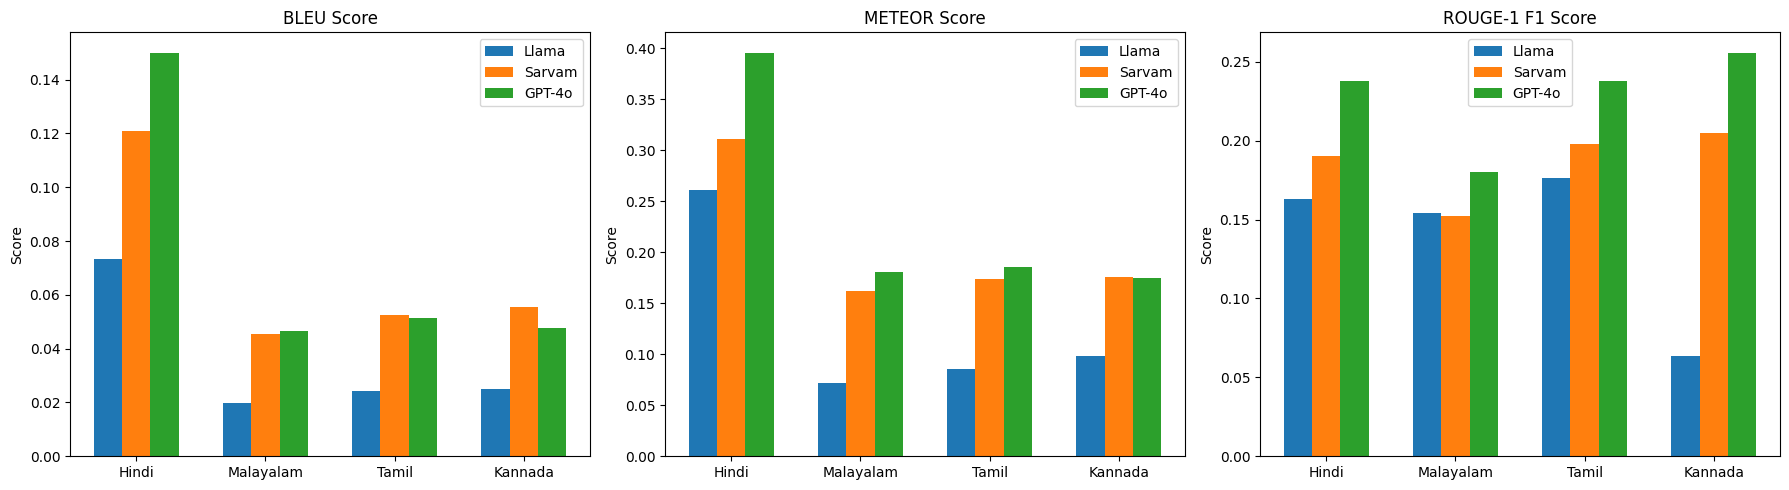

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for plotting
models = ['Llama', 'Sarvam', 'GPT-4o']
languages = ['Hindi', 'Malayalam', 'Tamil', 'Kannada']

# Reorder scores: Llama, Sarvam, GPT-4o
bleu_scores = [
    [llama_bleu_scores['Hindi'], llama_bleu_scores['Malayalam'], llama_bleu_scores['Tamil'], llama_bleu_scores['Kannada']],
    [sarvam_bleu_scores['Hindi'], sarvam_bleu_scores['Malayalam'], sarvam_bleu_scores['Tamil'], sarvam_bleu_scores['Kannada']],
    [gpt4o_bleu_scores['Hindi'], gpt4o_bleu_scores['Malayalam'], gpt4o_bleu_scores['Tamil'], gpt4o_bleu_scores['Kannada']]
]

meteor_scores = [
    [llama_meteor_scores['Hindi'], llama_meteor_scores['Malayalam'], llama_meteor_scores['Tamil'], llama_meteor_scores['Kannada']],
    [sarvam_meteor_scores['Hindi'], sarvam_meteor_scores['Malayalam'], sarvam_meteor_scores['Tamil'], sarvam_meteor_scores['Kannada']],
    [gpt4o_meteor_scores['Hindi'], gpt4o_meteor_scores['Malayalam'], gpt4o_meteor_scores['Tamil'], gpt4o_meteor_scores['Kannada']]
]

rouge1_scores = [
    [llama_rouge_scores['Hindi']['ROUGE-1'], llama_rouge_scores['Malayalam']['ROUGE-1'], llama_rouge_scores['Tamil']['ROUGE-1'], llama_rouge_scores['Kannada']['ROUGE-1']],
    [sarvam_rouge_scores['Hindi']['ROUGE-1'], sarvam_rouge_scores['Malayalam']['ROUGE-1'], sarvam_rouge_scores['Tamil']['ROUGE-1'], sarvam_rouge_scores['Kannada']['ROUGE-1']],
    [gpt4o_rouge_scores['Hindi']['ROUGE-1'], gpt4o_rouge_scores['Malayalam']['ROUGE-1'], gpt4o_rouge_scores['Tamil']['ROUGE-1'], gpt4o_rouge_scores['Kannada']['ROUGE-1']]
]

x = np.arange(len(languages))
width = 0.22

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# BLEU
for i, model in enumerate(models):
    axs[0].bar(x + i*width, bleu_scores[i], width, label=model)
axs[0].set_title('BLEU Score')
axs[0].set_xticks(x + width)
axs[0].set_xticklabels(languages)
axs[0].legend()
axs[0].set_ylabel('Score')

# METEOR
for i, model in enumerate(models):
    axs[1].bar(x + i*width, meteor_scores[i], width, label=model)
axs[1].set_title('METEOR Score')
axs[1].set_xticks(x + width)
axs[1].set_xticklabels(languages)
axs[1].legend()
axs[1].set_ylabel('Score')

# ROUGE-1 F1
for i, model in enumerate(models):
    axs[2].bar(x + i*width, rouge1_scores[i], width, label=model)
axs[2].set_title('ROUGE-1 F1 Score')
axs[2].set_xticks(x + width)
axs[2].set_xticklabels(languages)
axs[2].legend()
axs[2].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [49]:
import pandas as pd

# Prepare data for the table
data = {
    "Language": ["Hindi", "Malayalam", "Tamil", "Kannada"],
    "Sarvam BLEU": [sarvam_bleu_scores['Hindi'], sarvam_bleu_scores['Malayalam'], sarvam_bleu_scores['Tamil'], sarvam_bleu_scores['Kannada']],
    "Llama BLEU": [llama_bleu_scores['Hindi'], llama_bleu_scores['Malayalam'], llama_bleu_scores['Tamil'], llama_bleu_scores['Kannada']],
    "GPT-4o BLEU": [gpt4o_bleu_scores['Hindi'], gpt4o_bleu_scores['Malayalam'], gpt4o_bleu_scores['Tamil'], gpt4o_bleu_scores['Kannada']],
    "Sarvam METEOR": [sarvam_meteor_scores['Hindi'], sarvam_meteor_scores['Malayalam'], sarvam_meteor_scores['Tamil'], sarvam_meteor_scores['Kannada']],
    "Llama METEOR": [llama_meteor_scores['Hindi'], llama_meteor_scores['Malayalam'], llama_meteor_scores['Tamil'], llama_meteor_scores['Kannada']],
    "GPT-4o METEOR": [gpt4o_meteor_scores['Hindi'], gpt4o_meteor_scores['Malayalam'], gpt4o_meteor_scores['Tamil'], gpt4o_meteor_scores['Kannada']],
    "Sarvam ROUGE-1": [sarvam_rouge_scores['Hindi']['ROUGE-1'], sarvam_rouge_scores['Malayalam']['ROUGE-1'], sarvam_rouge_scores['Tamil']['ROUGE-1'], sarvam_rouge_scores['Kannada']['ROUGE-1']],
    "Llama ROUGE-1": [llama_rouge_scores['Hindi']['ROUGE-1'], llama_rouge_scores['Malayalam']['ROUGE-1'], llama_rouge_scores['Tamil']['ROUGE-1'], llama_rouge_scores['Kannada']['ROUGE-1']],
    "GPT-4o ROUGE-1": [gpt4o_rouge_scores['Hindi']['ROUGE-1'], gpt4o_rouge_scores['Malayalam']['ROUGE-1'], gpt4o_rouge_scores['Tamil']['ROUGE-1'], gpt4o_rouge_scores['Kannada']['ROUGE-1']]
}

df = pd.DataFrame(data)
# Format float columns for neatness
float_cols = df.columns.drop("Language")
df[float_cols] = df[float_cols].applymap(lambda x: f"{x:.4f}")
print(df.to_string(index=False))

 Language Sarvam BLEU Llama BLEU GPT-4o BLEU Sarvam METEOR Llama METEOR GPT-4o METEOR Sarvam ROUGE-1 Llama ROUGE-1 GPT-4o ROUGE-1
    Hindi      0.1210     0.0733      0.1501        0.3109       0.2607        0.3957         0.1904        0.1632         0.2376
Malayalam      0.0454     0.0198      0.0465        0.1615       0.0722        0.1810         0.1521        0.1545         0.1803
    Tamil      0.0525     0.0242      0.0515        0.1733       0.0855        0.1854         0.1980        0.1760         0.2377
  Kannada      0.0553     0.0251      0.0477        0.1753       0.0987        0.1748         0.2046        0.0636         0.2558


/var/folders/8w/vvk6gdlj70zgwp6z82ndv3lh0000gn/T/ipykernel_71079/2915080084.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[float_cols] = df[float_cols].applymap(lambda x: f"{x:.4f}")
